# 1. Perkenalan

- Nama : Wirawan Setio Aji
- Dataset : Rating player pada game FIFA 2022
- objective : Mencari prediksi rating 

# 2. Import Libraries

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [113]:
df_fifa = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv")

In [114]:
df_fifa

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [115]:
# Duplicate Dataframe
fifa_copy = df_fifa.copy()


In [116]:
# rename Colums

df_fifa.rename(columns={'ValueEUR':'Price','Overall':'Rating'},inplace=True)

- dalam data terdapat 3 data **string** / **object**

In [117]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


- data describe

In [118]:
df_fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19260.0,2.518468e+01,4.737340e+00,16.0,21.0,25.0,29.0,54.0
Height,19260.0,1.813050e+02,6.866151e+00,155.0,176.0,181.0,186.0,206.0
Weight,19260.0,7.495078e+01,7.066864e+00,49.0,70.0,75.0,80.0,110.0
Price,19260.0,2.857652e+06,7.604532e+06,0.0,475000.0,975000.0,2000000.0,194000000.0
PaceTotal,19260.0,6.791023e+01,1.065645e+01,28.0,62.0,68.0,75.0,97.0
ShootingTotal,19260.0,5.353551e+01,1.381348e+01,18.0,44.0,56.0,64.0,94.0
PassingTotal,19260.0,5.785332e+01,9.835494e+00,25.0,52.0,58.0,65.0,93.0
DribblingTotal,19260.0,6.302871e+01,9.704853e+00,26.0,58.0,64.0,69.0,95.0
DefendingTotal,19260.0,5.005810e+01,1.638880e+01,14.0,35.0,54.0,63.0,91.0
PhysicalityTotal,19260.0,6.467658e+01,9.626269e+00,29.0,58.0,66.0,72.0,92.0


# 4. Exploratory Data Analysis (EDA)
Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

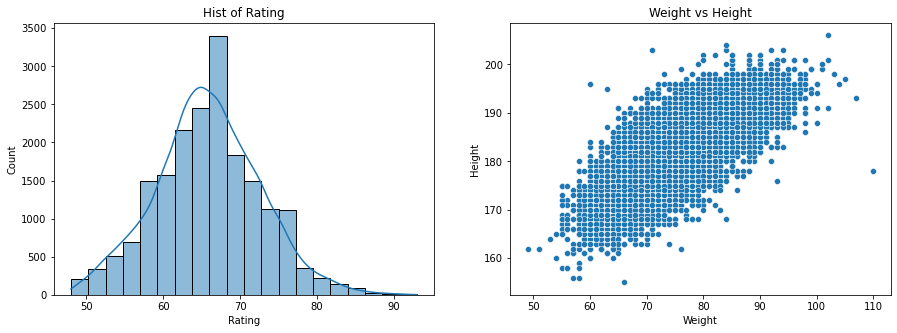

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df_fifa['Rating'],bins=20,kde=True)
plt.title('Hist of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x='Weight',y='Height',data=df_fifa)
plt.title('Weight vs Height')
plt.show()

# 5. Data preprocessing

pembagian **train** dan **test**

- inference set
- non inference set 
    - train set
    - test set

## get data for model inference

In [120]:
# get data for model inference
data_inf = df_fifa.sample(10,random_state=17)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [121]:
# REMOVE INFERENCE SET FROM DATA SET
data_train_test = df_fifa.drop(data_inf.index)
data_train_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [122]:
# reset index
data_train_test.reset_index(drop=True,inplace=True)


In [123]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70




memisahkan X (Features) dan y(Target)

In [124]:

X = data_train_test.drop('Rating',axis=1)
y = data_train_test['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


memisahkan train dan test

In [125]:
# train test and train set

from sklearn.model_selection import train_test_split


In [126]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17) 

print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (15400, 13)
x_test (3850, 13)


## Handling Outlier
pada pertemuan selasa 09 Aug

## Handling Missing Value
akan dijelaskan pada selasa 9 Aug 2022

In [127]:
# check missing values in 'x_train' 
x_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [128]:
# check missing values in 'x_test'
x_test.isnull().sum() 

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [129]:
# check missing values in y_train
y_train.isnull().sum()

0

In [130]:
# check missing value in y_test
y_test.isnull().sum()

0

data have no missing values is good to go

In [131]:
# display x_train

x_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,Quintana,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,R. Manaj,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,E. Vergani,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,Talles Magno,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,Lee Bum Young,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Ricardo Ferreira,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,Bruno Jordão,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,Lino Essier,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


berdasarkan personal judgement tak ada kaitan antara column `name` dengan `Rating` , buktinya `Danu Ronaldo` tidak ada kaitannya dengan `Christiano Ronaldo`

In [132]:
y_test

13192    63
13931    62
16360    59
16251    59
5172     70
         ..
5771     69
16973    58
6668     68
12161    64
5278     70
Name: Rating, Length: 3850, dtype: int64

In [133]:
# drop column name

x_train.drop('Name',axis=1,inplace=True)
x_test.drop('Name',axis=1,inplace=True)

In [134]:
x_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


cari data betipe `Numeric` lalu di scalling dan `catagorical` lalu encoding, setelah itu merge ==> model

## split between Numeric and category

In [135]:
num_columns = x_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns:',num_columns)
print('Category Columns:',cat_columns)

Numeric Columns: ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Category Columns: ['AttackingWorkRate', 'DefensiveWorkRate']


In [136]:
# split train_set based on col type

x_train_num = x_train[num_columns]
x_train_cat = x_train[cat_columns]

x_test_num = x_test[num_columns]
x_test_cat = x_test[cat_columns]


In [137]:
x_train_cat

,AttackingWorkRate,DefensiveWorkRate
9235,Medium,High
4199,Medium,Medium
12940,High,Medium
8147,High,Medium
15074,Medium,Medium
...,...,...
9529,Low,Medium
406,High,Low
13702,Medium,Medium
2191,Medium,Medium


## Feature scalling

In [138]:
x_train_num.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
count,15400.000000,15400.000000,15400.000000,1.540000e+04,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000
mean,25.182273,181.288052,74.926104,2.866596e+06,67.882208,53.550195,57.848117,63.017338,50.084351,64.694740
std,4.729238,6.869126,7.065049,7.538808e+06,10.701932,13.835679,9.807584,9.722490,16.375305,9.631822
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.000000,58.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000
75%,29.000000,186.000000,80.000000,2.100000e+06,75.000000,64.000000,65.000000,69.000000,63.000000,72.000000
max,54.000000,206.000000,107.000000,1.940000e+08,97.000000,94.000000,93.000000,92.000000,91.000000,92.000000


In [139]:
# feature scalling MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaler.fit(x_train_num) # mesin Belajar menggunakan data train (mesin harus belajar mana xmax dan xmin tiap column)

x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num) # propagasi / ditimpa 
x_train_num_scaled

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

## feature encoding

In [140]:
# display x_train_cat
x_train_cat

,AttackingWorkRate,DefensiveWorkRate
9235,Medium,High
4199,Medium,Medium
12940,High,Medium
8147,High,Medium
15074,Medium,Medium
...,...,...
9529,Low,Medium
406,High,Low
13702,Medium,Medium
2191,Medium,Medium


In [141]:
# feature encoding using ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

encoders =  OrdinalEncoder(categories=[['Low','Medium','High'],['Low','Medium','High']])
encoders.fit(x_train_cat)
                          
x_train_cat_encoded = encoders.transform(x_train_cat)
x_test_cat_encoded = encoders.transform(x_test_cat)

x_test_cat_encoded

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [2., 2.],
       [2., 1.]])

## Merging data numeric and categorical

In [142]:
x_train_final = np.concatenate([x_train_num_scaled,x_train_cat_encoded],axis=1)
x_test_final = np.concatenate([x_test_num_scaled,x_test_cat_encoded],axis=1)

In [143]:
# create dataframe of 'x_train_final'
x_train_final_df = pd.DataFrame(x_train_final,columns=[num_columns+cat_columns])

In [144]:
x_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,1.0,2.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,1.0,1.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,2.0,1.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,2.0,1.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,0.0,1.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,2.0,0.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,1.0,1.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,1.0,1.0


## 6. model definition
Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

1. misal algoritma yang dipakai adalah `linear regression`
2. Metrics yang akan dipakai adalah `Mean Absolute Error` (MAE)


In [145]:
# Training Linear Regression
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

- jika classification gunakan Logistic reg
- jika Regression menggunakan Linear Regresseion

## 7. Model Training
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [146]:
# train model menggunakan 'y_train', `x_train_final``
model_lin_reg.fit(x_train_final,y_train)

LinearRegression()

## 8. Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [147]:
# prediction Train Set and Test-set

y_pred_train = model_lin_reg.predict(x_train_final)
y_pred_test = model_lin_reg.predict(x_test_final)

In [148]:
y_train

9235     66
4199     71
12940    63
8147     67
15074    61
         ..
9529     66
406      80
13702    62
2191     74
10863    65
Name: Rating, Length: 15400, dtype: int64

In [149]:
# model evaluation using absolute error

from sklearn.metrics import mean_absolute_error

print('Error - Train Set :', mean_absolute_error(y_train,y_pred_train))
print('Error - Test Set :', mean_absolute_error(y_test,y_pred_test))


Error - Train Set : 2.3513401154422904
Error - Test Set : 2.3497331721374164


statement semestinya
1. nyatakan apakah model overfit/underfit
2. narasikan dalam bahasa bisnis
3. temukan hal yang unik


## 9. Model Saving

In [150]:
# saving 
import joblib
import json

with open('./export/model_lin_reg.pkl','wb') as file_1:joblib.dump(model_lin_reg,file_1)
with open('./export/model_scaler.pkl','wb') as file_2:joblib.dump(scaler,file_2)
with open('./export/model_encoder.pkl','wb') as file_3:joblib.dump(encoders,file_3)
with open('./export/list_num_cols.txt','w') as file_4:json.dump(num_columns,file_4)
with open('./export/list_cat_cols.txt','w') as file_5:json.dump(cat_columns,file_5)

## 10 Model Inference

In [151]:
# load semua file
import joblib
import json

with open('./export/model_lin_reg.pkl','rb') as file_1 : 
    model_lin_reg = joblib.load(file_1)
with open('./export/model_scaler.pkl','rb') as file_2 : 
    model_scaler = joblib.load(file_2)
with open('./export/model_encoder.pkl','rb') as file_3 : 
    model_encoder = joblib.load(file_3)
with open('./export/list_num_cols.txt','r') as file_4 : 
    list_num_cols = json.load(file_4)
with open('./export/list_cat_cols.txt','r') as file_5 : 
    list_cat_cols = json.load(file_5)

**Inferencing**

test

In [152]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [153]:
# split between numeric and categories columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

In [154]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [155]:
# feature scaling dan feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

In [156]:
# merging num and category

data_inf_final = np.concatenate([data_inf_num_scaled,data_inf_cat_encoded],axis=1)

data_inf_final

array([[4.21052632e-01, 4.90196078e-01, 3.62068966e-01, 3.47938144e-03,
        6.52173913e-01, 5.92105263e-01, 5.88235294e-01, 6.21212121e-01,
        4.41558442e-01, 6.19047619e-01, 2.00000000e+00, 0.00000000e+00],
       [2.89473684e-01, 3.92156863e-01, 4.48275862e-01, 7.73195876e-03,
        6.23188406e-01, 3.42105263e-01, 4.85294118e-01, 5.30303030e-01,
        6.49350649e-01, 7.46031746e-01, 1.00000000e+00, 1.00000000e+00],
       [1.05263158e-01, 4.50980392e-01, 2.75862069e-01, 4.89690722e-02,
        8.26086957e-01, 6.31578947e-01, 5.88235294e-01, 8.03030303e-01,
        3.76623377e-01, 5.55555556e-01, 2.00000000e+00, 0.00000000e+00],
       [5.52631579e-01, 5.68627451e-01, 5.51724138e-01, 5.67010309e-04,
        5.65217391e-01, 5.92105263e-01, 6.17647059e-01, 6.36363636e-01,
        4.28571429e-01, 6.34920635e-01, 1.00000000e+00, 1.00000000e+00],
       [2.63157895e-02, 6.47058824e-01, 5.00000000e-01, 5.67010309e-03,
        4.92753623e-01, 6.05263158e-01, 5.44117647e-01, 5.60

In [157]:
# predict linear regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([69.40855954, 68.65888225, 71.67029745, 70.67068251, 62.80545363,
       71.70469958, 61.41859391, 63.16158652, 61.90926356, 68.86685688])

In [158]:
# dataframe for view (Tidak Wajib)

y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['Rating_Prediction'])

In [159]:
y_pred_inf_df

,Rating_Prediction
0,69.408560
1,68.658882
2,71.670297
3,70.670683
4,62.805454
5,71.704700
6,61.418594
7,63.161587
8,61.909264
9,68.866857


In [160]:
# concate between inference set and

pd.concat([data_inf,y_pred_inf_df],axis=1)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Rating_Prediction
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.408560
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.658882
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.670297
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.670683
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.805454
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,71.704700
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.418594
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,63.161587
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.909264
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.866857


In [161]:
print('Intercept : ',model_lin_reg.intercept_)
print('Slope :',model_lin_reg.coef_)

# list all columns
x_train_final_df.columns

Intercept :  36.222532371631324
Slope : [ 7.5883957   2.06442948  1.05385459 39.15907544  3.15439873  2.99799434
  2.19712841 20.37879803  8.21691507 12.44338743 -0.32725332 -0.50123917]


MultiIndex([(              'Age',),
            (           'Height',),
            (           'Weight',),
            (            'Price',),
            (        'PaceTotal',),
            (    'ShootingTotal',),
            (     'PassingTotal',),
            (   'DribblingTotal',),
            (   'DefendingTotal',),
            ( 'PhysicalityTotal',),
            ('AttackingWorkRate',),
            ('DefensiveWorkRate',)],
           )

## 11. Kesimpulan 

1. jelaskan narasi based on EDA
2. narasi based on bahasa bisnis
3. Narasi based on Model Analysis
4. saran untuk kedepannya/ future  improvements
